In [ ]:
import random
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics


In [ ]:
import pandas as pd
cols_list = ['temperature', 'tousse', 'rithme respiratoire']
symptomes = pd.read_csv ('symptomes_dataset.csv', usecols=cols_list)
results = pd.read_csv ('symptomes_dataset.csv', usecols=['target'])


In [ ]:
'''
symptoms = []
results = []
for i in range(0, 25000):
    temperature = random.uniform(36.1, 40)
    touse = random.choice([0, 1])
    rythm_respiratoire = random.uniform(18, 23)
    covid_19 = 0
    if temperature > 37.5:
        if touse or (rythm_respiratoire > 20):
            covid_19 = 1
    elif touse and rythm_respiratoire > 20:
        covid_19 = 1

    # print("{},{},{},{}".format(temperature, touse, rythm_respiratoire, covid_19))
    symptoms.append([temperature, touse, rythm_respiratoire])
    results.append(covid_19)
print(symptoms)

'''

In [ ]:
#turn our data to csv file 
'''
import csv

with open("symptomes_dataset.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(['temperature', 'tousse', 'rithme respiratoire'])
    writer.writerows(symptoms)
'''

In [ ]:
#add target to csv file 
'''
df = pd.read_csv("symptomes_dataset.csv")
df["target"] = results 
df.to_csv("symptomes_dataset.csv", index=False)
'''

In [ ]:
'''
for i in range(0, len(symptoms)):
  print("{},{},{},{}".format(symptoms[i][0], symptoms[i][1], symptoms[i][2], results[i]))
'''

'\nfor i in range(0, len(symptoms)):\n  print("{},{},{},{}".format(symptoms[i][0], symptoms[i][1], symptoms[i][2], results[i]))\n'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(symptoms, results, test_size=0.2,random_state=20) # 70% training and 30% test
type(X_train[1][0])

float

In [ ]:
X_train_range = pd.DataFrame(X_train).max() - pd.DataFrame(X_train).min()
#X_train_range
X_train_scaled = (pd.DataFrame(X_train) - pd.DataFrame(X_train).min())/(X_train_range)
#X_train_scaled

,0,1,2
0,0.008312,0.0,0.445829
1,0.200752,0.0,0.978067
2,0.497547,1.0,0.505182
3,0.144528,0.0,0.807797
4,0.446882,0.0,0.299976
...,...,...,...
19995,0.012053,0.0,0.756290
19996,0.628781,1.0,0.344090
19997,0.543493,1.0,0.963963
19998,0.136449,1.0,0.255386


In [ ]:
#Create a svm Classifier
clf = svm.SVC() # Linear Kernel

In [ ]:
#Train the model using the training sets
clf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
X_test_range = (pd.DataFrame(X_test) - pd.DataFrame(X_test).min()).max()
#X_test_range
X_test_scaled = (pd.DataFrame(X_test) - pd.DataFrame(X_test).min())/(X_test_range)
#X_test_scaled

,0,1,2
0,0.427187,0.0,0.738370
1,0.231406,0.0,0.096421
2,0.754229,1.0,0.847780
3,0.201280,1.0,0.255696
4,0.947355,0.0,0.676532
...,...,...,...
4995,0.119357,0.0,0.862937
4996,0.901132,1.0,0.854161
4997,0.257916,1.0,0.605124
4998,0.383956,1.0,0.962097


In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test_scaled)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9892


In [85]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd

In [86]:
cm =np.array(confusion_matrix(y_test, y_pred, labels =[1,0]))
confusion = pd.DataFrame(cm, index=['is covid19', 'is healthy'], columns=['predicted_covid19','predicted_healthy'])
confusion 

,predicted_covid19,predicted_healthy
is covid19,3126,30
is healthy,24,1820


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


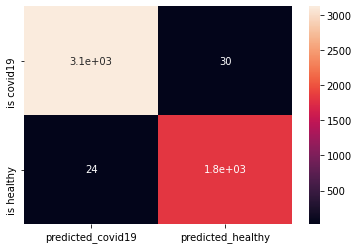

In [87]:
import seaborn as sns 
sns.heatmap(confusion, annot= True)